In [1]:
import cv2
import os
from matplotlib import pyplot as plt
from PIL import ImageFont, ImageDraw, Image
import numpy as np

In [10]:
frame_number = "00000239"
frame_string = frame_number + ".jpg"
path_to_frame = os.path.join("/home/oole/Data/Chokepoint/data/P1E_S1/P1E_S1_C1/", frame_string)

In [1]:
# Some helper functions to draw image with object boundary boxes
fontname = '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf'
font = ImageFont.truetype(fontname, 40) if os.path.isfile(fontname) else ImageFont.load_default()

def bbox(img, xmin, ymin, xmax, ymax, width, score):
    draw = ImageDraw.Draw(img)
    xres, yres = img.size[0], img.size[1]
    box = [xmin, ymin, xmax, ymax]#np.multiply([xmin, ymin, xmax, ymax], [xres, yres, xres, yres]).astype(int).tolist()
    draw.rectangle(box, outline=1, width=width, edgecolor='r')

def plot_img(img, axes, xmin, ymin, xmax, ymax):
    for i in range(len(xmin)):
        bbox(img, xmin[i], ymin[i], xmax[i], ymax[i], 5, -1)
#     bbox(img, xmin, ymin, xmax, ymax, 5, -1)
    plt.setp(axes, xticks=[], yticks=[])
    plt.imshow(img)

NameError: name 'os' is not defined

(600, 800, 3)


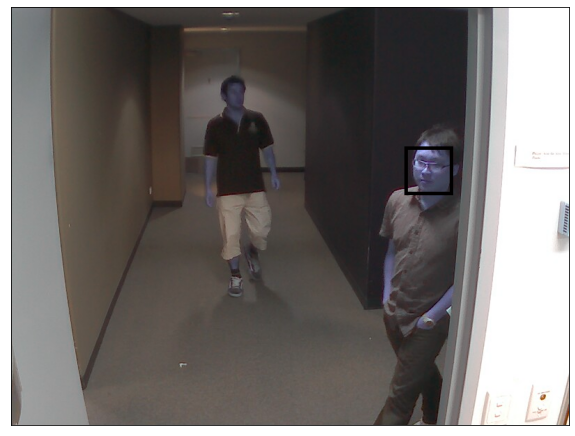

In [9]:
ymin, xmin, width, height = 211,574,49,49
xmin, ymin, xmax, ymax = xmin, ymin, xmin+width, ymin+height
def expand_bbox(xmin,ymin,xmax, ymax):
    expand_by =10
    xmin = xmin-expand_by
    xmax = xmax+expand_by
    ymin = ymin-expand_by
    ymax = ymax+expand_by
    return xmin, ymin, xmax, ymax

xmin, ymin, xmax,ymax = expand_bbox(xmin, ymin, xmax, ymax)
img = cv2.imread(path_to_frame)
print(img.shape)
img = Image.fromarray(img)
fig = plt.figure(figsize=(10,10))
axes = fig.add_subplot(1, 1, 1)
plot_img(img, axes, [xmin], [ymin], [xmax], [ymax])